## 1. 손 글씨 숫자 데이터셋
손글씨 숫자 데이터셋은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(검은색)에서 16(흰색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# sklearn 안에 들어가있는 데이터셋을 불러오기위해
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# min-batch 경사하강법을 쓰기위한 모듈
from torch.utils.data import DataLoader

In [152]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [153]:
X_data = digits['data']
X_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [154]:
y_data = digits['target']
y_data

array([0, 1, 2, ..., 8, 9, 8])

In [155]:
print(X_data)
print(y_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [156]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


### ※ axes.flatten()

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

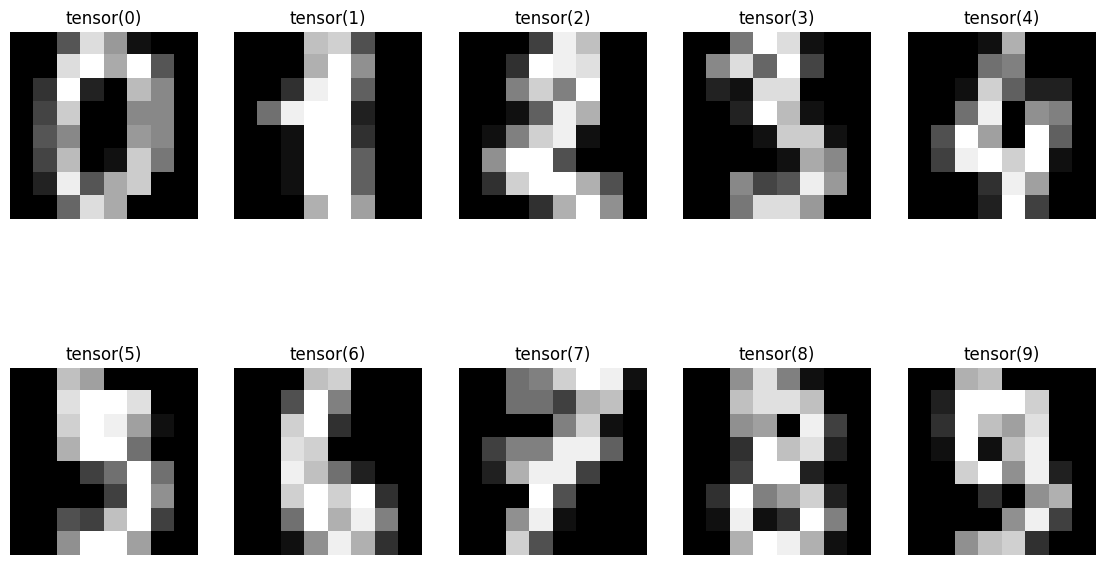

In [157]:
# nrow : 행 개수 , ncols : 열 개수
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))

# axes.flatten : 일단 한 열로 만들고 반복문 돌림(이중 for문과 같은 복잡한 for문과 유사기능)
for i, ax in enumerate(axes.flatten()):
    # gray 스케일에는 밝기정보가 있음 -> 밝기정보를 정규화시켜줄 수 있음
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    # 격자 X
    ax.axis('off')

In [158]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


## 2. 데이터 로더
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

### ※ 데이터로더의 주요 역할

- **배치 처리** : 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
- **셔플링** : 데이터 순서를 무작위로 섞어 과적합 방지.
- **병렬 처리** : num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
- **반복 처리**: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

In [159]:
loader = DataLoader(
    # 1. 데이터셋을 어떻게 제공할지 -> list로 tuple형식으로 넣어줄 것 (이미지 + 정답)
    dataset=list(zip(x_train, y_train)),
    # dataset을 64개씩 한 집단으로(batch)로 묶는다.
    batch_size=64,
    shuffle = True,
    drop_last=False
)

# train data = 1360개 중 64개 집단으로 묶었으니까 총 22개의 batch가 학습되는데,
# 이때 29개의 나머지 데이터셋이 남는다.
# 그래서 이 짜투리 29개를 학습할건지 묻는것 drop_last

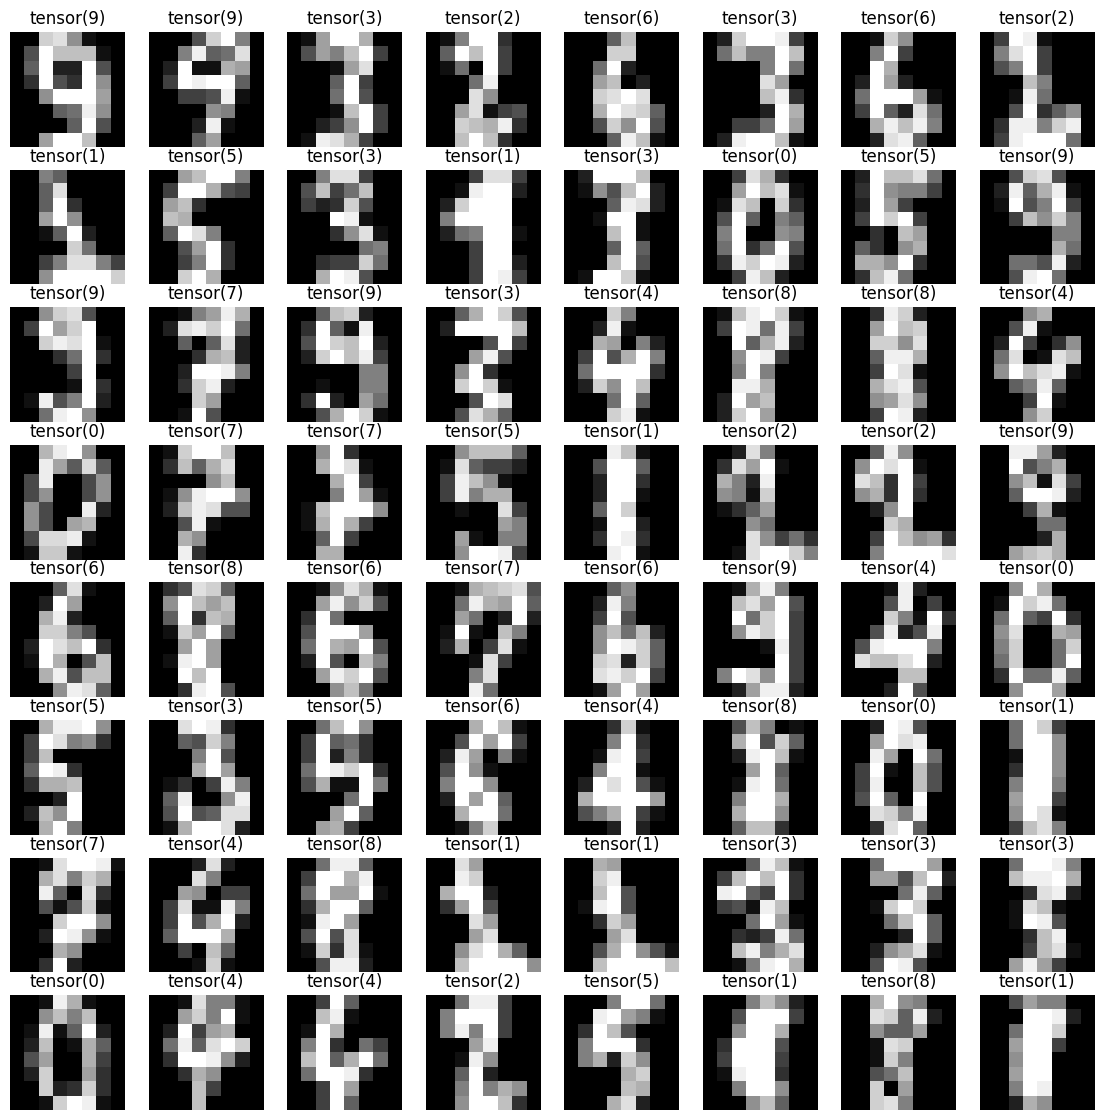

In [160]:
imgs, labels = next(iter(loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

# Batch 하나에 들어간 이미지+정답 데이터

## 모델 생성_학습률 0.01

In [161]:
model1 = nn.Sequential(
    nn.Linear(64, 10)       # loss 함수할 때 softmax에 의해 확률로 계산될 것임
)

optimizer = optim.Adam(model1.parameters(), lr=0.01)

In [162]:
epochs = 100

#  loss & accs 리스트에 담기
train_loss_1, train_acc_1 = [],[]

for epoch in range(epochs + 1):
    sum_losses = 0
    # 정확도
    sum_accs = 0

    # x_batch : 이미지 batch , y_batch : 정답 batch
    for x_batch, y_batch in loader:     # loader에 22 +1(짜투리 batch)
        y_pred = model1(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        # 기울기 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss값 누적 (총 23번) -> loss값 평균 구하기
        sum_losses = sum_losses + loss

        # 얼마나 잘 맞추는지도 알아보자!
        y_prob = nn.Softmax(1)(y_pred)
        # 그 중에서 가장 높은 값의 인덱스 뽑기
        y_pred_index = torch.argmax(y_prob, axis=1)
        # 정답과 예측이 맞는지? -> 0 or 1로 나올 것 그러고 전체로 나눔 -> 백분률
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        # 정답값 누적 (총 23번) -> 정확도 평균 구하기
        sum_accs = sum_accs + acc
        # // epoch 1번 끝


    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    train_loss_1.append(avg_loss.item())
    train_acc_1.append(avg_acc.item())

    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 1.871167 Accuracy: 60.20%
Epoch    1/100 Loss: 0.268289 Accuracy: 91.92%
Epoch    2/100 Loss: 0.143716 Accuracy: 94.63%
Epoch    3/100 Loss: 0.110921 Accuracy: 96.52%
Epoch    4/100 Loss: 0.089290 Accuracy: 97.28%
Epoch    5/100 Loss: 0.087850 Accuracy: 97.68%
Epoch    6/100 Loss: 0.091307 Accuracy: 96.88%
Epoch    7/100 Loss: 0.072684 Accuracy: 97.66%
Epoch    8/100 Loss: 0.092961 Accuracy: 97.04%
Epoch    9/100 Loss: 0.073485 Accuracy: 97.47%
Epoch   10/100 Loss: 0.080458 Accuracy: 97.27%
Epoch   11/100 Loss: 0.051366 Accuracy: 98.22%
Epoch   12/100 Loss: 0.043096 Accuracy: 98.71%
Epoch   13/100 Loss: 0.038133 Accuracy: 98.91%
Epoch   14/100 Loss: 0.036678 Accuracy: 99.39%
Epoch   15/100 Loss: 0.029394 Accuracy: 99.37%
Epoch   16/100 Loss: 0.032049 Accuracy: 99.25%
Epoch   17/100 Loss: 0.028995 Accuracy: 99.25%
Epoch   18/100 Loss: 0.028511 Accuracy: 99.24%
Epoch   19/100 Loss: 0.033563 Accuracy: 98.85%
Epoch   20/100 Loss: 0.030572 Accuracy: 99.32%
Epoch   21/10

tensor(5)


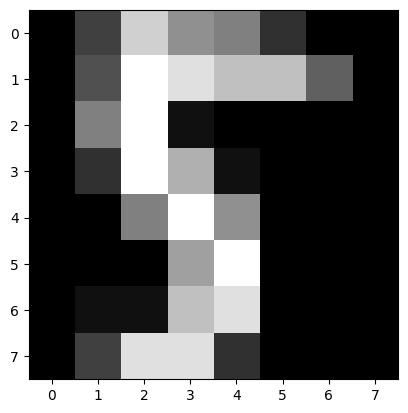

In [163]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [164]:
y_pred = model1(x_test)
y_pred[10]

tensor([ -4.9079, -10.5261,  -4.6346,  -0.2759,  -6.6848,  17.9960,  -9.9326,
          3.8843,   3.5452, -10.8742], grad_fn=<SelectBackward0>)

In [165]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([1.1297e-10, 4.1021e-13, 1.4848e-10, 1.1604e-08, 1.9110e-11, 1.0000e+00,
        7.4261e-13, 7.4361e-07, 5.2979e-07, 2.8963e-13],
       grad_fn=<SelectBackward0>)

In [166]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 1.00
숫자 6일 확률: 0.00
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [167]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  96.39% 입니다.


## 모델 생성_학습률 0.001

In [168]:
model2 = nn.Sequential(
    nn.Linear(64, 10)       # loss 함수할 때 softmax에 의해 확률로 계산될 것임
)

optimizer = optim.Adam(model2.parameters(), lr=0.001)

In [169]:
epochs = 100

#  loss & accs 리스트에 담기
train_loss_2, train_acc_2 = [],[]

for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model1(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc


    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    train_loss_2.append(avg_loss.item())
    train_acc_2.append(avg_acc.item())

    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 0.001883 Accuracy: 100.00%
Epoch    1/100 Loss: 0.001890 Accuracy: 100.00%
Epoch    2/100 Loss: 0.001956 Accuracy: 100.00%
Epoch    3/100 Loss: 0.001863 Accuracy: 100.00%
Epoch    4/100 Loss: 0.001854 Accuracy: 100.00%
Epoch    5/100 Loss: 0.001896 Accuracy: 100.00%
Epoch    6/100 Loss: 0.001861 Accuracy: 100.00%
Epoch    7/100 Loss: 0.001882 Accuracy: 100.00%
Epoch    8/100 Loss: 0.001875 Accuracy: 100.00%
Epoch    9/100 Loss: 0.001893 Accuracy: 100.00%
Epoch   10/100 Loss: 0.001903 Accuracy: 100.00%
Epoch   11/100 Loss: 0.001879 Accuracy: 100.00%
Epoch   12/100 Loss: 0.001891 Accuracy: 100.00%
Epoch   13/100 Loss: 0.001898 Accuracy: 100.00%
Epoch   14/100 Loss: 0.001898 Accuracy: 100.00%
Epoch   15/100 Loss: 0.001897 Accuracy: 100.00%
Epoch   16/100 Loss: 0.001917 Accuracy: 100.00%
Epoch   17/100 Loss: 0.001855 Accuracy: 100.00%
Epoch   18/100 Loss: 0.001949 Accuracy: 100.00%
Epoch   19/100 Loss: 0.001981 Accuracy: 100.00%
Epoch   20/100 Loss: 0.001857 Accuracy: 

tensor(5)


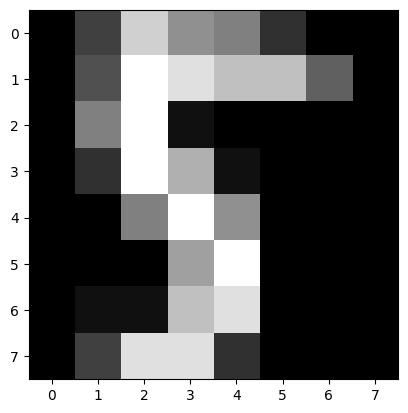

In [170]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [171]:
y_pred = model2(x_test)
y_pred[10]

tensor([-1.5897,  0.8358, -3.3894,  3.1334,  0.4146,  5.5970, -0.7699, -7.9164,
        -0.6432,  1.7462], grad_fn=<SelectBackward0>)

In [172]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([6.7244e-04, 7.6042e-03, 1.1118e-04, 7.5657e-02, 4.9901e-03, 8.8881e-01,
        1.5265e-03, 1.2022e-06, 1.7327e-03, 1.8898e-02],
       grad_fn=<SelectBackward0>)

In [173]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  5.00% 입니다.


## 모델 생성_학습률 0.0001

In [174]:
model3 = nn.Sequential(
    nn.Linear(64, 10)       # loss 함수할 때 softmax에 의해 확률로 계산될 것임
)

optimizer = optim.Adam(model3.parameters(), lr=0.0001)

In [175]:
epochs = 100

#  loss & accs 리스트에 담기
train_loss_3, train_acc_3 = [],[]

for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model1(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc


    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    train_loss_3.append(avg_loss.item())
    train_acc_3.append(avg_acc.item())

    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 0.001914 Accuracy: 100.00%
Epoch    1/100 Loss: 0.001982 Accuracy: 100.00%
Epoch    2/100 Loss: 0.001879 Accuracy: 100.00%
Epoch    3/100 Loss: 0.001855 Accuracy: 100.00%
Epoch    4/100 Loss: 0.001900 Accuracy: 100.00%
Epoch    5/100 Loss: 0.001892 Accuracy: 100.00%
Epoch    6/100 Loss: 0.001885 Accuracy: 100.00%
Epoch    7/100 Loss: 0.001876 Accuracy: 100.00%
Epoch    8/100 Loss: 0.001872 Accuracy: 100.00%
Epoch    9/100 Loss: 0.001868 Accuracy: 100.00%
Epoch   10/100 Loss: 0.001855 Accuracy: 100.00%
Epoch   11/100 Loss: 0.001885 Accuracy: 100.00%
Epoch   12/100 Loss: 0.001906 Accuracy: 100.00%
Epoch   13/100 Loss: 0.001910 Accuracy: 100.00%
Epoch   14/100 Loss: 0.001928 Accuracy: 100.00%
Epoch   15/100 Loss: 0.001885 Accuracy: 100.00%
Epoch   16/100 Loss: 0.001866 Accuracy: 100.00%
Epoch   17/100 Loss: 0.001912 Accuracy: 100.00%
Epoch   18/100 Loss: 0.001915 Accuracy: 100.00%
Epoch   19/100 Loss: 0.001964 Accuracy: 100.00%
Epoch   20/100 Loss: 0.001868 Accuracy: 

tensor(5)


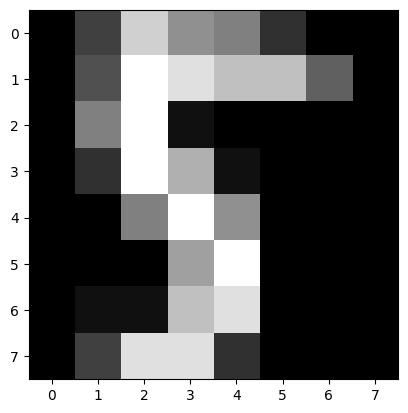

In [176]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [177]:
y_pred = model3(x_test)
y_pred[10]

tensor([ 3.4564, -5.9087,  0.3639,  0.4795, -5.2127,  4.5845,  9.6050, -6.5283,
        -7.5126,  0.6748], grad_fn=<SelectBackward0>)

In [178]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([2.1173e-03, 1.8138e-07, 9.6108e-05, 1.0788e-04, 3.6378e-07, 6.5421e-03,
        9.9100e-01, 9.7606e-08, 3.6477e-08, 1.3115e-04],
       grad_fn=<SelectBackward0>)

In [179]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  13.06% 입니다.


## 학습률에 따른 loss & accuracy 변화곡선

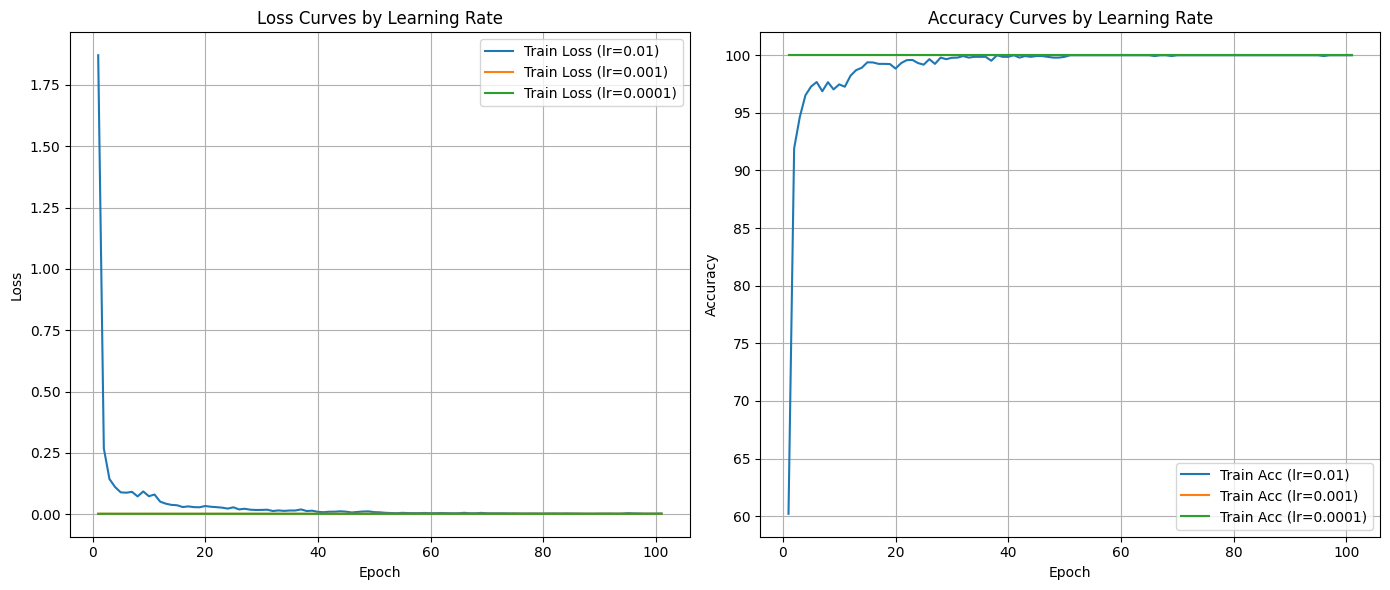

In [180]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss_1)+1)

plt.figure(figsize=(14,6))

# ---- Loss 곡선 ----
plt.subplot(1,2,1)
plt.plot(epochs, train_loss_1, label='Train Loss (lr=0.01)')
plt.plot(epochs, train_loss_2, label='Train Loss (lr=0.001)')
plt.plot(epochs, train_loss_3, label='Train Loss (lr=0.0001)')
plt.title('Loss Curves by Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ---- Accuracy 곡선 ----
plt.subplot(1,2,2)
plt.plot(epochs, train_acc_1, label='Train Acc (lr=0.01)')
plt.plot(epochs, train_acc_2, label='Train Acc (lr=0.001)')
plt.plot(epochs, train_acc_3, label='Train Acc (lr=0.0001)')

plt.title('Accuracy Curves by Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 그래프 분석

### 1. lr = 0.01
- 가중치 변화가 가장 크다.
    -  why? 업데이트가 한번에 다 이루어지므로 손실함수의 변화폭이 크다.

- 최소 손실값을 지나쳐서 오히려 손실이 다시 커질 위험이 있따.
- Loss 곡선이 급하강 하는 등 변화폭이 가장 가파름
- Accuraccy도 급상승 하고 진폭 변화가 다른 비율보다 가장 많다.
<br>

### 2. lr = 0.001
- 위에 그래프상에 보이지 않을정도로 수렴 그 자체..
- 만약 변화폭이 있다고 한들 가장 안정적으로 수렴할 수 있을 것으로 추측된다.
<br>

### 3. lr = 0.0001
- 가중치 변화가 너무 없다. 없어도 너무 없는 듯 거의 일직선의 결과가 나왔다.
- 가중치 변화가 없다는 것은 학습이 매우 느릴 수 있다는 걸 추측할 수 있다.


## 훈련데이터의 비율 50%

In [181]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=2025)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

model4 = nn.Sequential(
    nn.Linear(64, 10)       # loss 함수할 때 softmax에 의해 확률로 계산될 것임
)

optimizer = optim.Adam(model4.parameters(), lr=0.01)

epochs = 100

for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model4(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc


    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')


torch.Size([898, 64]) torch.Size([898])
torch.Size([899, 64]) torch.Size([899])
Epoch    0/100 Loss: 2.128823 Accuracy: 54.14%
Epoch    1/100 Loss: 0.304371 Accuracy: 90.51%
Epoch    2/100 Loss: 0.169092 Accuracy: 94.75%
Epoch    3/100 Loss: 0.132647 Accuracy: 95.73%
Epoch    4/100 Loss: 0.110496 Accuracy: 96.94%
Epoch    5/100 Loss: 0.097877 Accuracy: 96.59%
Epoch    6/100 Loss: 0.089155 Accuracy: 96.81%
Epoch    7/100 Loss: 0.080502 Accuracy: 97.00%
Epoch    8/100 Loss: 0.073603 Accuracy: 97.55%
Epoch    9/100 Loss: 0.061995 Accuracy: 98.29%
Epoch   10/100 Loss: 0.065962 Accuracy: 97.80%
Epoch   11/100 Loss: 0.057894 Accuracy: 98.15%
Epoch   12/100 Loss: 0.054573 Accuracy: 98.44%
Epoch   13/100 Loss: 0.044025 Accuracy: 98.97%
Epoch   14/100 Loss: 0.041102 Accuracy: 99.32%
Epoch   15/100 Loss: 0.036183 Accuracy: 99.31%
Epoch   16/100 Loss: 0.036666 Accuracy: 99.25%
Epoch   17/100 Loss: 0.034765 Accuracy: 99.18%
Epoch   18/100 Loss: 0.028170 Accuracy: 99.39%
Epoch   19/100 Loss: 0.0264

In [182]:
y_pred = model4(x_test)
y_pred[10]

tensor([ -5.1677, -10.0747,  -3.3868,   0.0965,  -6.9205,  14.2956, -11.5302,
          0.4780,   2.2137,  -6.4604], grad_fn=<SelectBackward0>)

In [183]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([3.5252e-09, 2.6068e-11, 2.0923e-08, 6.8135e-07, 6.1087e-10, 9.9999e-01,
        6.0813e-12, 9.9791e-07, 5.6606e-06, 9.6772e-10],
       grad_fn=<SelectBackward0>)

In [184]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  98.89% 입니다.


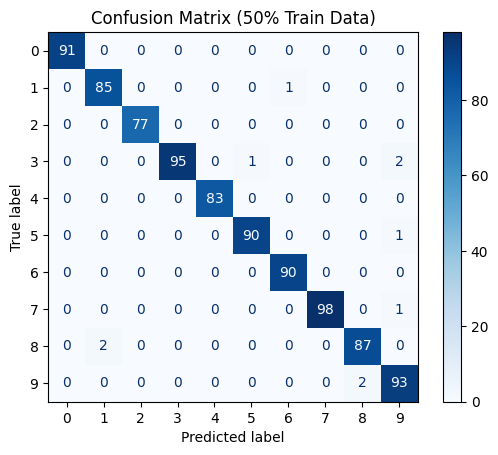

총 오분류 개수: 10
첫 10개 오분류 인덱스: [  4  42  67 101 121 169 180 199 286 354]


In [185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

with torch.no_grad():
    x_test_tensor = torch.FloatTensor(x_test)
    y_pred = model4(x_test_tensor)
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_classes = torch.argmax(y_prob, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (50% Train Data)")
plt.show()

y_pred_np = y_pred_classes.detach().cpu().numpy()
y_test_np = np.array(y_test)

misclassified_idx = np.where(y_test_np != y_pred_np)[0]
print(f"총 오분류 개수: {len(misclassified_idx)}")
print(f"첫 10개 오분류 인덱스: {misclassified_idx[:10]}")


> 10개의 오분류를 보면 획이나 모양이 유사한 숫자에서 정확히 학습하지 못한 것을 알 수 있는데, 이는 훈련데이터가 50%로 데이터가 부족하여 발생한 것을 알 수 있다.
또한, CNN과 같은 특징을 잡아서 분류한게 아니라 단순 분류로 인해 작은 차이를 구별하지 못하는 것 같다.